In [1]:
from Datos import Datos
from EstrategiaParticionado import *
from Clasificador import *
import matplotlib.pyplot as plt
import numpy as np

<h4>Declaración de funciones generales</h4>

In [2]:
def transformar_datos(dataset):
    
    # Utilizamos el diccionario para adaptar los datos
    for i in range(dataset.datos.shape[0]):
        for j in range(dataset.datos.shape[1]):
            if dataset.nominalAtributos[j]:
                dataset.datos[i, j] = dataset.diccionario[j][dataset.datos[i, j]]
                
    

def get_train_test(dataset, seed=None, p=0.2):
    vs = ValidacionSimple(p, 1)
    particiones = vs.creaParticiones(len(dataset.datos), seed=seed)

    datostrain = dataset.extraeDatos(particiones[0].indicesTrain)
    datostest = dataset.extraeDatos(particiones[0].indicesTest)
    datostrain = datostrain.astype('float32')
    datostest = datostest.astype('float32')
    return datostrain, datostest

<h4>Prueba inicial del funcionamiento del código</h4>

Utilizamos los parámetros:

    tamanio_poblacion=50
    n_epocas=100
    reglas_por_ind=5
    
Los parámetros que no están especificados toman los valores por defecto:
    
    pelitismo=0.05
    puntos_cruce=1
    p_mutacion=0.01

Añadimos un parámetro, *flag_print* que permite especificar si se quiere o no que la función imprima la evolución del fitness medio y el fitness del mejor individuo.
Por defecto el valor es *True*.

In [3]:
dataset = Datos('titanic.data')

transformar_datos(dataset)
datostrain, datostest = get_train_test(dataset)

ag = AlgoritmoGenetico()
ag.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario, tamanio_poblacion=50, n_epocas=100, reglas_por_ind=5)

Generacion: 0
Fitness medio: 0.5019211469534051
Fitness mejor individuo: 0.5648745519713262
###################################################
Generacion: 1
Fitness medio: 0.4966929510155316
Fitness mejor individuo: 0.5624850657108722
###################################################
Generacion: 2
Fitness medio: 0.49834647550776573
Fitness mejor individuo: 0.5675029868578255
###################################################
Generacion: 3
Fitness medio: 0.5123010752688172
Fitness mejor individuo: 0.5945041816009558
###################################################
Generacion: 4
Fitness medio: 0.5252759856630824
Fitness mejor individuo: 0.5978494623655914
###################################################
Generacion: 5
Fitness medio: 0.5271541218637994
Fitness mejor individuo: 0.5973715651135006
###################################################
Generacion: 6
Fitness medio: 0.5475555555555556
Fitness mejor individuo: 0.5995221027479092
###########################################

Imprimimos el mejor individuo de la última generación.

In [4]:
print(ag.ultimo_individuo)

[[1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1]
 [1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 1 1]
 [1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1]
 [1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1]]


In [5]:
pred = ag.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario)

Y el porcentaje de error, siendo este en general menor del 25%.

In [6]:
print(ag.error(datostest, pred))

0.22966507177033493


<h1> Apartado 1 </h1>

<h3> a. Generación de la población inicial </h3>

Dado el conjunto de datos de train, para cada dato perteneciente a este creamos una regla. 

Después, para cada individuo seleccionamos *reglas_por_ind* reglas de forma aleatoria.

De forma más esquemática, a partir de datostrain generamos el conjunto de reglas $R$ = {$r_1$, $r_2$, $r_3$, ..., $r_n$} donde $n$ es el número de elementos en datostrain. 

A partir de estas reglas generamos {$I_1$, $I_2$, ..., $I_k$} individuos donde k es el dato correspondiente al parámetro *tamanio_poblacion*.

Para obtener un individuo seleccionamos de forma aleatoria *reglas_por_ind* reglas del conjunto $R$.

<h3> b. Mecanismo de cruce implementado </h3>

Implementamos varias posibilidades para cruce. El mecanismo de cruce es controlado por el prámetro *puntos_cruce* cuyo valor por defecto es 1. 

En caso de que este parámetro sea None, se utiliza el cruce uniforme. En caso contrario, cruce en el número de puntos especificado por este párametro.

**Cruce uniforme**

Dado un bit del hijo1, se elige de forma aleatoria de que padre proviene este bit, el otro hijo heredara el bit de otro padre. 

**Cruce en n puntos**

Se eligen n puntos de forma aleatoria. Los dos padres se dividen por estos puntos. Los dos hijos se producen al intercalar las partes de los padres.

Por ejemplo, siendo los padres 111111 y 000000 con dos puntos de cruce (1, y 4) los hijos serían: 100011 y 011100. 

<h3> c. Mecanismo de mutación implementado </h3>

Para cada individuo de la población, para cada regla de este individuo y por cada bit de la regla se genera un número aleatorio. En el caso de que este número sea menor a *p_mutacion*, este bit se cambia.

La probabilidad *p_mutacion* es la probabilidad de que un bit en concreto cambie. La probabilidad de que surja una mutación en un individuo sería *p_mutacion* por el número de bits que componen el individuo.

<h3> d. Mecanismo de clasificación implementado </h3>

Para cada dato del conjunto de test se realiza lo siguiente. 

Se tiene un contador de votos para cada clase. 
Para cada regla que contiene el mejor individuo se mira si el dato cumple esa regla, en caso de cumplirla, se suma un voto a la clase de la regla, en caso contrario, se suma un voto a la hora clase. 

Se devuelve la clase más votada. 

<h1> Apartado 2 </h1>

<h3> a. Conjunto de datos: tic-tac-toe </h3

Obtenemos los conjuntos de test y train en formato adecuado.

In [7]:
dataset = Datos('tic-tac-toe.data')

transformar_datos(dataset)
datostrain, datostest = get_train_test(dataset)

**Porcentaje de aciertos frente al tamaño de la población**

Ejecutamos el algoritmo con *tamanio_poblacion* variando entre 50 y 200 individuos de 10 en 10 con *n_epocas* fijo en 20 (se fija un número bajo por los tiempos de ejecución).

En el resto de parámetros se utilizan los valores por defecto:

    elitismo=0.05
    puntos_cruce=1
    p_mutacion=0.02
    reglas_por_ind=3

In [12]:
ag = AlgoritmoGenetico()
porcentaje_aciertos_tic_tam = []

192
[True, True, True, True, True, True, True, True, True, True]


In [ ]:
for tam in range(50, 201, 10):
    print("Numero de individuos: " + str(tam))
    ag.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario, tamanio_poblacion=tam, n_epocas=20)
    pred = ag.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario)
    porcentaje_aciertos_tic_tam.append(1-ag.error(datostest, pred))
    print(porcentaje_aciertos_tic_tam[-1])
    

In [ ]:
plt.figure()
plt.plot(range(50, 201, 10), porcentaje_aciertos_tic_tam)
#plt.legend()
#plt.ylim(0.5, 1)
plt.xlabel("Tamanio de la poblacion")
plt.ylabel("Porcentaje de aciertos")
plt.title("Porcentaje de aciertos frente al tamanio de la poblacion")
plt.show()

**Porcentaje de aciertos frente al número de épocas**

Ejecutamos el algoritmo con *n_epocas* variando entre 50 y 200 de 10 en 10 con *tamanio_pobalcion* fijo en 20 (se fija un número bajo por los tiempos de ejecución).

En el resto de parámetros se utilizan los valores por defecto:

    elitismo=0.05
    puntos_cruce=1
    p_mutacion=0.02
    reglas_por_ind=3

In [ ]:
porcentaje_aciertos_tic_epocas = []

In [ ]:
for n_epocas in range(50, 201, 10):
    print("Numero de epocas: " + str(tam))
    ag.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario, tamanio_poblacion=20, n_epocas=n_epocas, flag_print=False)
    pred = ag.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario)
    porcentaje_aciertos_tic_epocas.append(1-ag.error(datostest, pred))
    print(porcentaje_aciertos_tic_epocas[-1])

In [ ]:
plt.figure()
plt.plot(range(50, 201, 10), porcentaje_aciertos_tic_epocas)
#plt.legend()
#plt.ylim(0.5, 1)
plt.xlabel("Numero de epocas")
plt.ylabel("Porcentaje de aciertos")
plt.title("Porcentaje de aciertos frente al numero de epocas")
plt.show()

Lo esperado es que los resultados mejoren a medida que aumenten ambos parámetros aunque estabilizandose en un cierto punto.

Así que, ejecutamos una vez más el algoritmo escogiedo los valores altos para cada parámetro, comprobando que el porcentaje de aciertos es mayor, e imprimimos el mejor individuo generado.

In [ ]:
ag.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario, tamanio_poblacion=150, n_epocas=100, flag_print=False)

In [ ]:
pred = ag.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario)
print("Porcentaje de aciertos: ", 1-ag.error(datostest, pred))
print("Mejor individuo:")
print(ag.ultimo_individuo)

<h3> b. Conjunto de datos: titanic </h3>

Obtenemos los conjuntos de test y train en formato adecuado.

In [80]:
dataset = Datos('titanic.data')

transformar_datos(dataset)
datostrain, datostest = get_train_test(dataset)

**Porcentaje de aciertos frente al tamaño de la población**

Ejecutamos el algoritmo con *tamanio_poblacion* variando entre 50 y 200 individuos de 10 en 10 con *n_epocas* fijo en 20 (se fija un número bajo por los tiempos de ejecución).

En el resto de parámetros se utilizan los valores por defecto:

    elitismo=0.05
    puntos_cruce=1
    p_mutacion=0.02
    reglas_por_ind=3

In [81]:
ag = AlgoritmoGenetico()
porcentaje_aciertos_titanic_tam = []

In [82]:
for tam in range(50, 201, 10):
    print("Numero de individuos: " + str(tam))
    ag.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario, tamanio_poblacion=tam, n_epocas=20, flag_print=False)
    pred = ag.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario)
    porcentaje_aciertos_titanic_tam.append(1-ag.error(datostest, pred))
    print(porcentaje_aciertos_titanic_tam[-1])

Numero de individuos: 50
0.5598086124401913
Numero de individuos: 60
0.6172248803827751
Numero de individuos: 70
0.6602870813397129
Numero de individuos: 80
0.6363636363636364
Numero de individuos: 90
0.5311004784688995
Numero de individuos: 100
0.5789473684210527
Numero de individuos: 110
0.569377990430622
Numero de individuos: 120
0.6507177033492824
Numero de individuos: 130
0.6842105263157895
Numero de individuos: 140
0.6411483253588517
Numero de individuos: 150
0.6842105263157895
Numero de individuos: 160
0.6220095693779905
Numero de individuos: 170
0.6124401913875598
Numero de individuos: 180
0.69377990430622
Numero de individuos: 190
0.6698564593301435
Numero de individuos: 200
0.6459330143540669


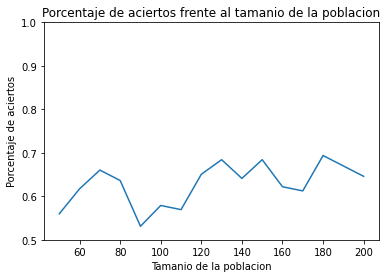

In [83]:
plt.figure()
plt.plot(range(50, 201, 10), porcentaje_aciertos_titanic_tam)
plt.ylim(0.5, 1)
plt.xlabel("Tamanio de la poblacion")
plt.ylabel("Porcentaje de aciertos")
plt.title("Porcentaje de aciertos frente al tamanio de la poblacion")
plt.show()

**Porcentaje de aciertos frente al número de épocas**

Ejecutamos el algoritmo con *n_epocas* variando entre 50 y 200 de 10 en 10 con *tamanio_pobalcion* fijo en 20 (se fija un número bajo por los tiempos de ejecución).

En el resto de parámetros se utilizan los valores por defecto:

    elitismo=0.05
    puntos_cruce=1
    p_mutacion=0.01
    reglas_por_ind=3

In [84]:
porcentaje_aciertos_titanic_epocas = []

In [ ]:
for n_epocas in range(50, 201, 10):
    print("Numero de epocas: " + str(n_epocas))
    ag.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario, tamanio_poblacion=20, n_epocas=n_epocas, flag_print=False)
    pred = ag.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario)
    porcentaje_aciertos_titanic_epocas.append(1-ag.error(datostest, pred))
    print(porcentaje_aciertos_titanic_epocas[-1])

Numero de epocas: 50


In [ ]:
plt.figure()
plt.plot(range(50, 201, 10), porcentaje_aciertos_titanic_epocas)
plt.ylim(0.5, 1)
plt.xlabel("Numero de epocas")
plt.ylabel("Porcentaje de aciertos")
plt.title("Porcentaje de aciertos frente al numero de epocas")
plt.show()

Lo esperado es que los resultados mejoren a medida que aumenten ambos parámetros aunque estabilizandose en un cierto punto. Pero los datos que usamos pueden ser demasiado pequeños. 

Así que, ejecutamos una vez más el algoritmo escogiedo los valores altos para cada parámetro, comprobando que el porcentaje de aciertos es mayor, e imprimimos el mejor individuo generado.

In [ ]:
ag.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario, tamanio_poblacion=150, n_epocas=100, flag_print=False)

In [ ]:
pred = ag.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario)
print("Porcentaje de aciertos: ", 1-ag.error(datostest, pred))
print("Mejor individuo:")
print(ag.ultimo_individuo)

<h1> Apartado 3 </h1>

<h2> Conjunto de datos: tic-tac-toe <\h2>

In [ ]:
dataset = Datos('tic-tac-toe.data')

transformar_datos(dataset)
datostrain, datostest = get_train_test(dataset)

<h3> a. Porcentaje de aciertos frente a número de reglas </h3>

Ejecutamos el algoritmo con *reglas_por_ind* variando entre 1 y 10 con *n_epocas* = 50 y *tamanio_poblacion* = 50.

En el resto de parámetros se utilizan los valores por defecto:

    elitismo=0.05
    puntos_cruce=1
    p_mutacion=0.02

In [ ]:
ag = AlgoritmoGenetico()
porcentaje_aciertos_tic_reglas = []

In [ ]:
for n_reglas in range(1, 11):
    print("Numero de reglas por individuo: " + str(n_reglas))
    ag.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario, tamanio_poblacion=50, n_epocas=50, reglas_por_ind=n_reglas, flag_print=False)
    pred = ag.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario)
    porcentaje_aciertos_tic_reglas.append(1-ag.error(datostest, pred))
    print(porcentaje_aciertos_tic_reglas[-1])

In [ ]:
plt.figure()
plt.plot(range(1, 11), porcentaje_aciertos_tic_reglas)
plt.ylim(0.5, 1)
plt.xlabel("Numero de reglas por individuo")
plt.ylabel("Porcentaje de aciertos")
plt.title("Porcentaje de aciertos frente al numero de reglas por individuo")
plt.show()

<h3> b. Porcentaje de aciertos frente a número de individuos </h3>

Ya hemos tomado los datos en el apartado anteior pero volveremos a incluir la gráfica:

In [ ]:
plt.figure()
plt.plot(range(50, 201, 10), porcentaje_aciertos_tic_tam)
plt.ylim(0.5, 1)
plt.xlabel("Tamanio de la poblacion")
plt.ylabel("Porcentaje de aciertos")
plt.title("Porcentaje de aciertos frente al tamanio de la poblacion")
plt.show()

<h3> c. Porcentaje de aciertos frente a número de generaciones </h3>

In [ ]:
Ya hemos tomado los datos en el apartado anteior pero volveremos a incluir la gráfica:

In [ ]:
plt.figure()
plt.plot(range(50, 201, 10), porcentaje_aciertos_tic_epocas)
plt.ylim(0.5, 1)
plt.xlabel("Numero de epocas")
plt.ylabel("Porcentaje de aciertos")
plt.title("Porcentaje de aciertos frente al numero de epocas")
plt.show()

<h3> d. Porcentaje de aciertos frente a tasa de cruce </h3>

In [ ]:
Ejecutamos el algoritmo con *puntos_cruce* variando entre 1 y 10 con *n_epocas* = 50 y *tamanio_poblacion* = 50.

En el resto de parámetros se utilizan los valores por defecto:

    elitismo=0.05
    p_mutacion=0.02
    reglas_por_ind=3

In [ ]:
ag = AlgoritmoGenetico()
porcentaje_aciertos_tic_puntos = []

In [ ]:
for n_puntos in range(1, 11):
    print("Numero de puntos de cruce: " + str(n_puntos))
    ag.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario, tamanio_poblacion=50, n_epocas=50, puntos_cruce=n_puntos, flag_print=False)
    pred = ag.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario)
    porcentaje_aciertos_tic_puntos.append(1-ag.error(datostest, pred))
    print(porcentaje_aciertos_tic_puntos[-1])

In [ ]:
plt.figure()
plt.plot(range(1, 11), porcentaje_aciertos_tic_puntos)
plt.ylim(0.5, 1)
plt.xlabel("Numero de puntos de cruce")
plt.ylabel("Porcentaje de aciertos")
plt.title("Porcentaje de aciertos frente al numero de puntos de cruce")
plt.show()

<h3> e. Porcentaje de aciertos frente a tasa de mutación </h3>

In [ ]:
Ejecutamos el algoritmo con *p_mutacion* variando entre 0.001 y 0.1 con *n_epocas* = 50 y *tamanio_poblacion* = 50.

En el resto de parámetros se utilizan los valores por defecto:

    elitismo=0.05
    puntos_cruce=1
    reglas_por_ind=3

In [ ]:
ag = AlgoritmoGenetico()
porcentaje_aciertos_tic_pmut = []

In [ ]:
p_mutaciones = [0.001, 0.005, 0.007, 0.01, 0.03, 0.05, 0.07, 0.09, 0.1]

for p in p_mutaciones:
    print("Probabilidad de mutacion: " + str(p))
    ag.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario, tamanio_poblacion=50, n_epocas=50, p_mutacion=p, flag_print=False)
    pred = ag.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario)
    porcentaje_aciertos_tic_pmut.append(1-ag.error(datostest, pred))
    print(porcentaje_aciertos_tic_pmut[-1])

In [ ]:
plt.figure()
plt.plot(p_mutaciones, porcentaje_aciertos_tic_pmut)
plt.ylim(0.5, 1)
plt.xlabel("Probabilidad de mutacion")
plt.ylabel("Porcentaje de aciertos")
plt.title("Porcentaje de aciertos frente a la probabilidad de mutacion")
plt.show()

<h2> Conjunto de datos: titanic <\h2>

In [ ]:
dataset = Datos('titanic.data')

transformar_datos(dataset)
datostrain, datostest = get_train_test(dataset)

<h3> a. Porcentaje de aciertos frente a número de reglas </h3>

Ejecutamos el algoritmo con *reglas_por_ind* variando entre 1 y 10 con *n_epocas* = 50 y *tamanio_poblacion* = 50.

En el resto de parámetros se utilizan los valores por defecto:

    elitismo=0.05
    puntos_cruce=1
    p_mutacion=0.02

In [ ]:
ag = AlgoritmoGenetico()
porcentaje_aciertos_titanic_reglas = []

In [ ]:
for n_reglas in range(1, 11):
    print("Numero de reglas por individuo: " + str(n_reglas))
    ag.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario, tamanio_poblacion=50, n_epocas=50, reglas_por_ind=n_reglas, flag_print=False)
    pred = ag.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario)
    porcentaje_aciertos_titanic_reglas.append(1-ag.error(datostest, pred))
    print(porcentaje_aciertos_titanic_reglas[-1])

In [ ]:
plt.figure()
plt.plot(range(1, 11), porcentaje_aciertos_titanic_reglas)
plt.ylim(0.5, 1)
plt.xlabel("Numero de reglas por individuo")
plt.ylabel("Porcentaje de aciertos")
plt.title("Porcentaje de aciertos frente al numero de reglas por individuo")
plt.show()

<h3> b. Porcentaje de aciertos frente a número de individuos </h3>

Ya hemos tomado los datos en el apartado anteior pero volveremos a incluir la gráfica:

In [ ]:
plt.figure()
plt.plot(range(50, 201, 10), porcentaje_aciertos_titanic_tam)
plt.ylim(0.5, 1)
plt.xlabel("Tamanio de la poblacion")
plt.ylabel("Porcentaje de aciertos")
plt.title("Porcentaje de aciertos frente al tamanio de la poblacion")
plt.show()

<h3> c. Porcentaje de aciertos frente a número de generaciones </h3>

In [ ]:
Ya hemos tomado los datos en el apartado anteior pero volveremos a incluir la gráfica:

In [ ]:
plt.figure()
plt.plot(range(50, 201, 10), porcentaje_aciertos_titanic_epocas)
plt.ylim(0.5, 1)
plt.xlabel("Numero de epocas")
plt.ylabel("Porcentaje de aciertos")
plt.title("Porcentaje de aciertos frente al numero de epocas")
plt.show()

<h3> d. Porcentaje de aciertos frente puntos de cruce </h3>

In [ ]:
Ejecutamos el algoritmo con *puntos_cruce* variando entre 1 y 10 con *n_epocas* = 50 y *tamanio_poblacion* = 50.

En el resto de parámetros se utilizan los valores por defecto:

    elitismo=0.05
    p_mutacion=0.02
    reglas_por_ind=3

In [ ]:
ag = AlgoritmoGenetico()
porcentaje_aciertos_titanic_puntos = []

In [ ]:
for n_puntos in range(1, 11):
    print("Numero de puntos de cruce: " + str(n_puntos))
    ag.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario, tamanio_poblacion=50, n_epocas=50, puntos_cruce=n_puntos, flag_print=False)
    pred = ag.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario)
    porcentaje_aciertos_titanic_puntos.append(1-ag.error(datostest, pred))
    print(porcentaje_aciertos_titanic_puntos[-1])

In [ ]:
plt.figure()
plt.plot(range(1, 11), porcentaje_aciertos_titanic_puntos)
plt.ylim(0.5, 1)
plt.xlabel("Numero de puntos de cruce")
plt.ylabel("Porcentaje de aciertos")
plt.title("Porcentaje de aciertos frente al numero de puntos de cruce")
plt.show()

<h3> e. Porcentaje de aciertos frente a tasa de mutación </h3>

In [ ]:
Ejecutamos el algoritmo con *p_mutacion* variando entre 0.001 y 0.1 con *n_epocas* = 50 y *tamanio_poblacion* = 50.

En el resto de parámetros se utilizan los valores por defecto:

    elitismo=0.05
    puntos_cruce=1
    reglas_por_ind=3

In [ ]:
ag = AlgoritmoGenetico()
porcentaje_aciertos_titanic_pmut = []

In [ ]:
p_mutaciones = [0.001, 0.005, 0.007, 0.01, 0.03, 0.05, 0.07, 0.09, 0.1]

for p in p_mutaciones:
    print("Probabilidad de mutacion: " + str(p))
    ag.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario, tamanio_poblacion=50, n_epocas=50, p_mutacion=p, flag_print=False)
    pred = ag.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario)
    porcentaje_aciertos_titanic_pmut.append(1-ag.error(datostest, pred))
    print(porcentaje_aciertos_titanic_pmut[-1])

In [ ]:
plt.figure()
plt.plot(p_mutaciones, porcentaje_aciertos_titanic_pmut)
plt.ylim(0.5, 1)
plt.xlabel("Probabilidad de mutacion")
plt.ylabel("Porcentaje de aciertos")
plt.title("Porcentaje de aciertos frente a la probabilidad de mutacion")
plt.show()

<h1> Apartado 4 </h1>

In [64]:
import sys
from io import StringIO

<h2> Conjunto de datos: tic-tac-toe <\h2>

In [65]:
stdout = sys.stdout
s = StringIO()
sys.stdout = s

In [66]:
dataset = Datos('tic-tac-toe.data')

transformar_datos(dataset)
datostrain, datostest = get_train_test(dataset)

ag = AlgoritmoGenetico()
ag.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario, tamanio_poblacion=50, n_epocas=100, reglas_por_ind=5)

In [67]:
sys.stdout = stdout
arr = s.seek(0)
arr = s.read().split('\n')

In [68]:
datos_mejor_tic = []
datos_medio_tic = []

for i in range(0, len(arr)-1, 4):
    datos_medio_tic.append(arr[i+1].split()[2])
    datos_mejor_tic.append(arr[i+2].split()[3])

datos_mejor_tic = list(map(float, datos_mejor_tic))
datos_medio_tic = list(map(float, datos_medio_tic))

<h3> a. Evolución del fitness del mejor individuo de la población </h3>

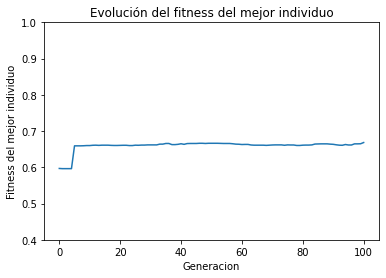

In [69]:
plt.figure()
plt.plot(range(len(datos_mejor_tic)), datos_mejor_tic)
plt.ylim(0.4, 1)
plt.xlabel("Generacion")
plt.ylabel("Fitness del mejor individuo")
plt.title("Evolución del fitness del mejor individuo")
plt.show()

<h3> b. Evolución del fitness medio de la población </h3>

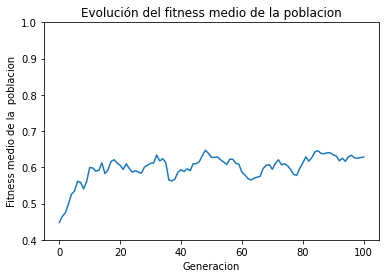

In [70]:
plt.figure()
plt.plot(range(len(datos_medio_tic)), datos_medio_tic)
plt.ylim(0.4, 1)
plt.xlabel("Generacion")
plt.ylabel("Fitness medio de la  poblacion")
plt.title("Evolución del fitness medio de la poblacion")
plt.show()

Representando ambas gráficas en una imágen:

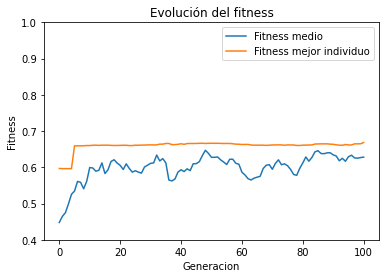

In [71]:
plt.figure()
plt.plot(range(len(datos_medio_tic)), datos_medio_tic, label='Fitness medio')
plt.plot(range(len(datos_mejor_tic)), datos_mejor_tic, label='Fitness mejor individuo')
plt.ylim(0.4, 1)
plt.legend()
plt.xlabel("Generacion")
plt.ylabel("Fitness")
plt.title("Evolución del fitness")
plt.show()

<h2> Conjunto de datos: titanic <\h2>

In [73]:
stdout = sys.stdout
s = StringIO()
sys.stdout = s

In [74]:
dataset = Datos('titanic.data')

transformar_datos(dataset)
datostrain, datostest = get_train_test(dataset)

ag = AlgoritmoGenetico()
ag.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario, tamanio_poblacion=50, n_epocas=100, reglas_por_ind=5)

In [75]:
sys.stdout = stdout
arr = s.seek(0)
arr = s.read().split('\n')

In [76]:
datos_mejor_titanic = []
datos_medio_titanic = []

for i in range(0, len(arr)-1, 4):
    datos_medio_titanic.append(arr[i+1].split()[2])
    datos_mejor_titanic.append(arr[i+2].split()[3])

datos_mejor_titanic = list(map(float, datos_mejor_titanic))
datos_medio_titanic = list(map(float, datos_medio_titanic))

<h3> a. Evolución del fitness del mejor individuo de la población </h3>

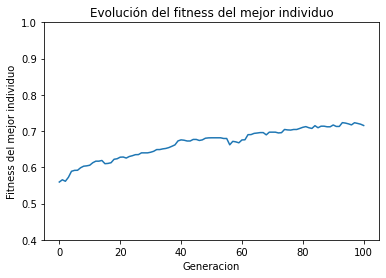

In [77]:
plt.figure()
plt.plot(range(len(datos_mejor_titanic)), datos_mejor_titanic)
plt.ylim(0.4, 1)
plt.xlabel("Generacion")
plt.ylabel("Fitness del mejor individuo")
plt.title("Evolución del fitness del mejor individuo")
plt.show()

<h3> b. Evolución del fitness medio de la población </h3>

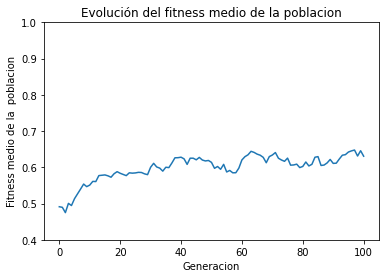

In [78]:
plt.figure()
plt.plot(range(len(datos_medio_titanic)), datos_medio_titanic)
plt.ylim(0.4, 1)
plt.xlabel("Generacion")
plt.ylabel("Fitness medio de la  poblacion")
plt.title("Evolución del fitness medio de la poblacion")
plt.show()

Representando ambas gráficas en una imágen:

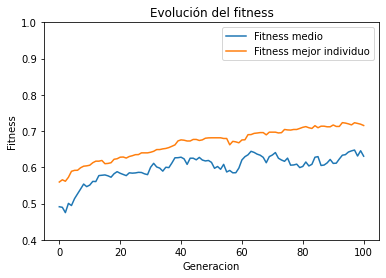

In [79]:
plt.figure()
plt.plot(range(len(datos_medio_titanic)), datos_medio_titanic, label='Fitness medio')
plt.plot(range(len(datos_mejor_titanic)), datos_mejor_titanic, label='Fitness mejor individuo')
plt.ylim(0.4, 1)
plt.legend()
plt.xlabel("Generacion")
plt.ylabel("Fitness")
plt.title("Evolución del fitness")
plt.show()

<h1> Apartado 5 </h1>